# 1. Setup

## 1.1 Imports

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
import tensorflow as tf
import tensorboard
import Utils
import datetime

Using TensorFlow backend.


## 1.2 Set random seeds

In [2]:
np.random.seed(117)
tf.set_random_seed(117)

## 1.3 Global variables

In [3]:
img_width = 100
img_height = 100
img_channels = 3

# 2. Carga de datos

In [4]:
bees, bees_test_for_evaluation = Utils.read_data()

In [5]:
bees.head()

,id,datetime,file,location,zip code,subspecies,health,pollen_carrying,caste
0,0,2018-08-06 14:48:00,020_011.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
1,1,2018-08-21 09:00:00,032_507.png,"Des Moines, IA, USA",50315,Russian honey bee,healthy,False,worker
2,2,2018-08-21 09:00:00,032_612.png,"Des Moines, IA, USA",50315,Russian honey bee,healthy,False,worker
3,3,2018-08-17 17:50:00,030_773.png,"Alvin, TX, USA",77511,Italian honey bee,ant problems,False,worker
4,4,2018-08-06 13:19:00,015_1052.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker


In [6]:
bees_test_for_evaluation.head()

,id,datetime,file,location,zip code,pollen_carrying,caste
0,0,2018-08-28 16:07:00,042_012.png,"Alvin, TX, USA",77511,False,worker
1,1,2018-08-10 13:54:00,022_114.png,"Saratoga, CA, USA",95070,False,worker
2,2,2018-08-18 12:30:00,038_384.png,"Athens, Georgia, USA",30607,False,worker
3,3,2018-08-17 17:50:00,030_740.png,"Alvin, TX, USA",77511,False,worker
4,4,2018-07-07 12:56:00,005_310.png,"Saratoga, CA, USA",95070,False,worker


# 3. Análisis exploratorio de datos

## 3.1 Análisis descriptivo: Distribuciones, Scatterplots, Barplots...

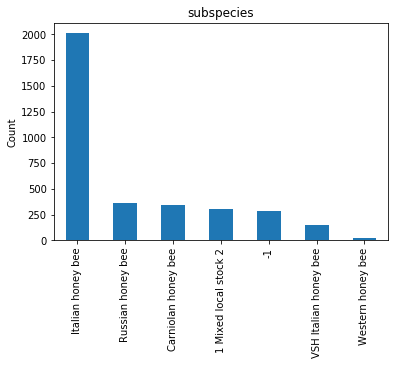

In [7]:
Utils.value_counts(bees, 'subspecies')

## 3.2 Ver imágenes

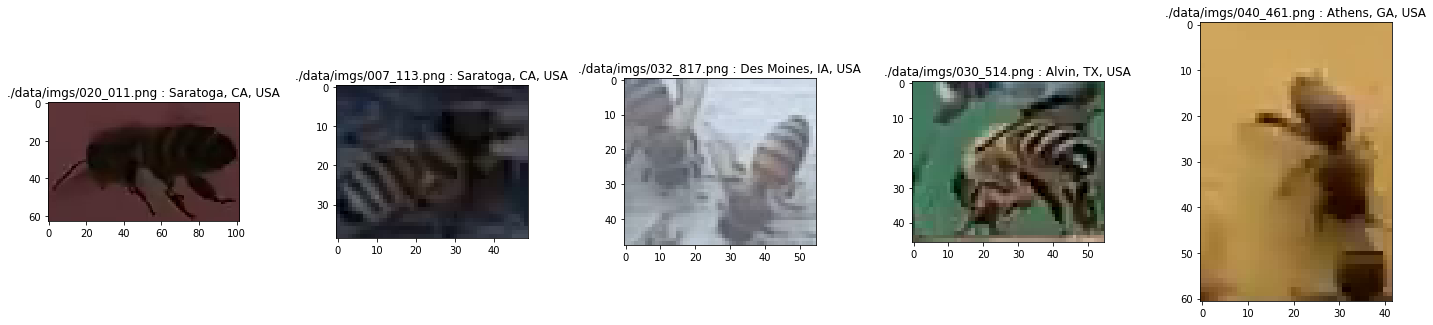

In [8]:
Utils.plot_images(bees, 'location', [0, 18, 24, 38, 45])

# 4. Clasificación

## 4.1. Data preprocessing
### 4.1.1 Particionamiento

In [9]:
train_bees, val_bees, test_bees = Utils.split(bees)
train_bees

,id,datetime,file,location,zip code,subspecies,health,pollen_carrying,caste
225,225,2018-08-06 13:19:00,015_996.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
2453,2453,2018-08-06 13:19:00,015_895.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
3009,3009,2018-08-21 15:56:00,040_526.png,"Athens, GA, USA",30607,Italian honey bee,"few varrao, hive beetles",False,worker
3270,3270,2018-08-19 12:46:00,010_123.png,"Des Moines, IA, USA",50315,Carniolan honey bee,healthy,False,worker
2622,2622,2018-08-10 13:54:00,022_361.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
...,...,...,...,...,...,...,...,...,...
1275,1275,2018-08-28 16:07:00,042_004.png,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1439,1439,2018-08-06 19:19:00,019_1195.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker
1175,1175,2018-08-17 17:50:00,030_883.png,"Alvin, TX, USA",77511,Italian honey bee,ant problems,False,worker
2765,2765,2018-08-10 13:54:00,022_379.png,"Saratoga, CA, USA",95070,Italian honey bee,healthy,False,worker



### 4.1.2 Carga de imágenes

In [10]:
train_X, val_X, test_X, train_y, val_y, test_y = Utils.load_images_and_target(train_bees, 
                                                                              val_bees, 
                                                                              test_bees,
                                                                              'subspecies',
                                                                              img_width, 
                                                                              img_height,
                                                                              img_channels)

## 4.2 CNN

In [13]:
optimizer = 'sgd'
loss = 'categorical_crossentropy'

In [14]:
Num_Architecture = 2
#model1 = Sequential()
#model1.add(Flatten(input_shape =(img_height, img_width, img_channels)))
#model1.add(Dense(train_y.columns.size, activation = 'softmax'))
#model1.summary()


model1 = Sequential()
model1.add(Conv2D(32,kernel_size=3,padding='same',activation='relu',input_shape =(img_height, img_width, img_channels))) #capa Conv
model1.add(MaxPool2D(3))

model1.add(Conv2D(16, kernel_size=3, activation='relu', padding='same'))
model1.add(MaxPool2D(3))

#model1.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
#model1.add(MaxPool2D(3))

#model1.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
#model1.add(MaxPool2D(2))
# Add output layer
model1.add(Flatten())
#model1.add(Dropout(rate=0.1)) 
model1.add(Dense(train_y.columns.size, activation = 'softmax'))
model1.summary()
           





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 33, 33, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1936)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 13559     
Total params: 19,079
Trainable params: 19,079
Non-trainable params: 0
_________________________________________________________________


## 4.3 Entrenamiento

### 4.2.2 Parámetros de transformación de imágenes (data augmentation)

In [15]:
rotation_range = 270      # rotación aleatoria en grados entre 0 a rotation_range
zoom_range = 0.10         # zoom aleatorio
width_shift_range = 0.6  # desplazamiento horizontal aleatorio (fracción del total)
height_shift_range = 0.6 # desplazamiento vertical aleatorio (fracción del total)
horizontal_flip = True   # transposición horizontal
vertical_flip = True     # transposición horizontal

In [17]:

epochs = 50
steps_per_epoch = 80
patience = 35
class_weights = Utils.class_weights(bees, 'subspecies')

In [18]:
class_weights

array([ 1.75531915,  1.64451827,  1.43895349,  0.24626866,  1.375     ,
        3.39041096, 22.5       ])


--------------------------------Inicio----------------------------------------
StartTime:  20191115-112835  lr: 0.01  batch: 150 epochs:  80  inicio iteracion:  1

Epoch 1/80
180/180 [==============================] - 67s 374ms/step - loss: 1.0971 - acc: 0.6306 - val_loss: 0.7083 - val_acc: 0.7038

Epoch 2/80
180/180 [==============================] - 65s 362ms/step - loss: 0.7085 - acc: 0.7387 - val_loss: 0.4079 - val_acc: 0.8346
Epoch 3/80
180/180 [==============================] - 66s 368ms/step - loss: 0.5208 - acc: 0.7950 - val_loss: 0.4311 - val_acc: 0.8269
Epoch 4/80
180/180 [==============================] - 67s 373ms/step - loss: 0.5034 - acc: 0.7973 - val_loss: 0.4076 - val_acc: 0.8038
Epoch 5/80
180/180 [==============================] - 66s 364ms/step - loss: 0.4520 - acc: 0.8133 - val_loss: 0.3891 - val_acc: 0.8000
Epoch 6/80
180/180 [==============================] - 66s 366ms/step - loss: 0.4270 - acc: 0.8240 - val_loss: 0.4429 - val_acc: 0.7923
Epoch 7/80
180/180 [====

Epoch 59/80
180/180 [==============================] - 64s 354ms/step - loss: 0.3428 - acc: 0.8591 - val_loss: 0.2981 - val_acc: 0.8692
Epoch 60/80
180/180 [==============================] - 64s 354ms/step - loss: 0.3038 - acc: 0.8736 - val_loss: 0.2562 - val_acc: 0.8769
Epoch 61/80
180/180 [==============================] - 64s 353ms/step - loss: 0.2778 - acc: 0.8778 - val_loss: 0.2824 - val_acc: 0.8423
Epoch 62/80
180/180 [==============================] - 64s 353ms/step - loss: 0.2935 - acc: 0.8746 - val_loss: 0.2468 - val_acc: 0.8654
Epoch 63/80
180/180 [==============================] - 65s 359ms/step - loss: 0.2858 - acc: 0.8777 - val_loss: 0.3177 - val_acc: 0.8385
Epoch 64/80
180/180 [==============================] - 64s 354ms/step - loss: 0.2757 - acc: 0.8789 - val_loss: 0.2507 - val_acc: 0.8654
Epoch 65/80
180/180 [==============================] - 64s 353ms/step - loss: 0.2912 - acc: 0.8779 - val_loss: 0.2718 - val_acc: 0.8423
Epoch 66/80
180/180 [===========================

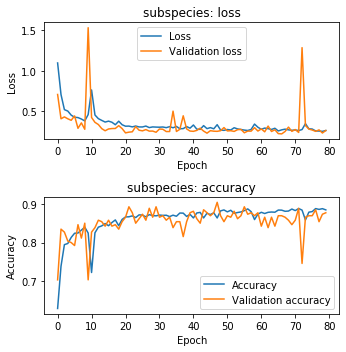

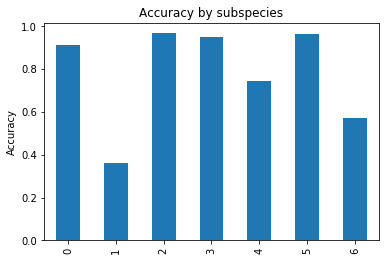

Classification report
                       precision    recall  f1-score   support

                   -1       0.93      0.91      0.92        70
1 Mixed local stock 2       0.54      0.36      0.43        69
  Carniolan honey bee       0.93      0.98      0.95        92
    Italian honey bee       0.87      0.95      0.91       490
    Russian honey bee       1.00      0.77      0.87       110
VSH Italian honey bee       0.93      0.97      0.95        29
    Western honey bee       1.00      0.57      0.73         7

             accuracy                           0.88       867
            macro avg       0.89      0.79      0.82       867
         weighted avg       0.87      0.88      0.87       867

Loss function: 0.28150283383268465, accuracy: 0.8788927335640139
StartTime:  20191115-112835  lr: 0.01  batch: 150 epochs:  80  Fin iteracion:  2
-------------------------------FIN-----------------------------------------


--------------------------------Inicio--------------------

Epoch 53/100
180/180 [==============================] - 66s 369ms/step - loss: 0.2453 - acc: 0.8942 - val_loss: 0.2754 - val_acc: 0.8846
Epoch 54/100
180/180 [==============================] - 65s 360ms/step - loss: 0.2898 - acc: 0.8782 - val_loss: 0.2273 - val_acc: 0.8846
Epoch 55/100
180/180 [==============================] - 64s 357ms/step - loss: 0.3236 - acc: 0.8741 - val_loss: 0.3247 - val_acc: 0.8808
Epoch 56/100
180/180 [==============================] - 64s 357ms/step - loss: 0.2388 - acc: 0.8962 - val_loss: 0.3281 - val_acc: 0.8885
Epoch 57/100
180/180 [==============================] - 65s 359ms/step - loss: 0.2381 - acc: 0.8946 - val_loss: 0.2869 - val_acc: 0.8962
Epoch 58/100
180/180 [==============================] - 64s 356ms/step - loss: 0.2788 - acc: 0.8813 - val_loss: 0.3079 - val_acc: 0.8846
Epoch 59/100
180/180 [==============================] - 64s 356ms/step - loss: 0.2935 - acc: 0.8847 - val_loss: 0.3087 - val_acc: 0.8923
Epoch 60/100
180/180 [===================

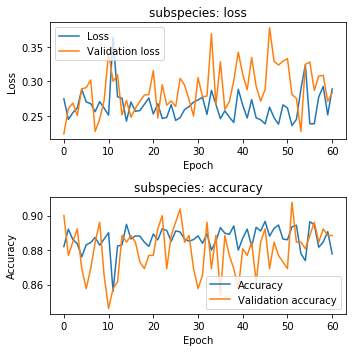

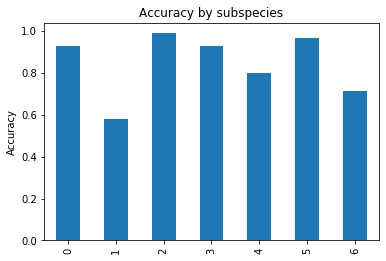

Classification report
                       precision    recall  f1-score   support

                   -1       0.97      0.93      0.95        70
1 Mixed local stock 2       0.57      0.58      0.58        69
  Carniolan honey bee       0.88      0.99      0.93        92
    Italian honey bee       0.91      0.93      0.92       490
    Russian honey bee       0.98      0.82      0.89       110
VSH Italian honey bee       0.88      0.97      0.92        29
    Western honey bee       1.00      0.71      0.83         7

             accuracy                           0.89       867
            macro avg       0.88      0.85      0.86       867
         weighted avg       0.89      0.89      0.89       867

Loss function: 0.2334057243415572, accuracy: 0.8915801614763552
StartTime:  20191115-125443  lr: 0.01  batch: 150 epochs:  100  Fin iteracion:  3
-------------------------------FIN-----------------------------------------


--------------------------------Inicio--------------------

270/270 [==============================] - 41s 151ms/step - loss: 0.2958 - acc: 0.8755 - val_loss: 0.3440 - val_acc: 0.8538
Epoch 54/80
270/270 [==============================] - 40s 149ms/step - loss: 0.3134 - acc: 0.8722 - val_loss: 0.3499 - val_acc: 0.8462
Epoch 55/80
270/270 [==============================] - 40s 150ms/step - loss: 0.2724 - acc: 0.8838 - val_loss: 0.3195 - val_acc: 0.8615
Epoch 56/80
270/270 [==============================] - 40s 149ms/step - loss: 0.2932 - acc: 0.8782 - val_loss: 0.3720 - val_acc: 0.8538
Epoch 57/80
270/270 [==============================] - 41s 151ms/step - loss: 0.3053 - acc: 0.8759 - val_loss: 0.3589 - val_acc: 0.8538
Epoch 58/80
270/270 [==============================] - 40s 149ms/step - loss: 0.3492 - acc: 0.8600 - val_loss: 0.3678 - val_acc: 0.8423
Epoch 59/80
270/270 [==============================] - 40s 150ms/step - loss: 0.3219 - acc: 0.8678 - val_loss: 0.3465 - val_acc: 0.8808
Epoch 60/80
270/270 [==============================] - 41s 1

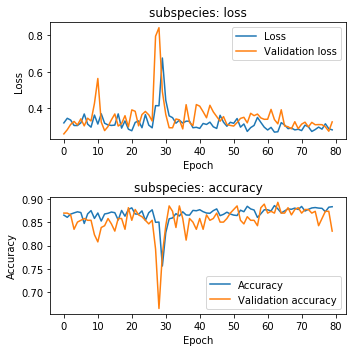

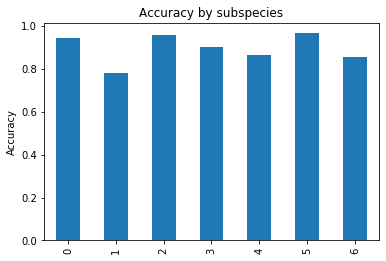

Classification report
                       precision    recall  f1-score   support

                   -1       0.99      0.94      0.96        70
1 Mixed local stock 2       0.52      0.78      0.63        69
  Carniolan honey bee       0.98      0.96      0.97        92
    Italian honey bee       0.94      0.90      0.92       490
    Russian honey bee       0.98      0.87      0.92       110
VSH Italian honey bee       0.90      0.97      0.93        29
    Western honey bee       1.00      0.86      0.92         7

             accuracy                           0.90       867
            macro avg       0.90      0.90      0.89       867
         weighted avg       0.92      0.90      0.91       867

Loss function: 0.2911683321983372, accuracy: 0.9008073817762399
StartTime:  20191115-140108  lr: 0.01  batch: 60 epochs:  80  Fin iteracion:  4
-------------------------------FIN-----------------------------------------


--------------------------------Inicio----------------------

Epoch 53/100
270/270 [==============================] - 40s 150ms/step - loss: 0.2669 - acc: 0.8887 - val_loss: 0.2896 - val_acc: 0.8423
Epoch 54/100
270/270 [==============================] - 41s 150ms/step - loss: 0.2717 - acc: 0.8851 - val_loss: 0.2682 - val_acc: 0.8615
Epoch 55/100
270/270 [==============================] - 40s 149ms/step - loss: 0.2606 - acc: 0.8897 - val_loss: 0.2648 - val_acc: 0.8654
Epoch 56/100
270/270 [==============================] - 40s 150ms/step - loss: 0.2797 - acc: 0.8832 - val_loss: 0.2568 - val_acc: 0.8577
Epoch 57/100
270/270 [==============================] - 42s 155ms/step - loss: 0.2851 - acc: 0.8816 - val_loss: 0.3403 - val_acc: 0.8423
Epoch 58/100
270/270 [==============================] - 40s 149ms/step - loss: 0.2901 - acc: 0.8798 - val_loss: 0.2891 - val_acc: 0.8615
Epoch 59/100
270/270 [==============================] - 40s 150ms/step - loss: 0.2674 - acc: 0.8860 - val_loss: 0.3536 - val_acc: 0.8577
Epoch 60/100
270/270 [===================

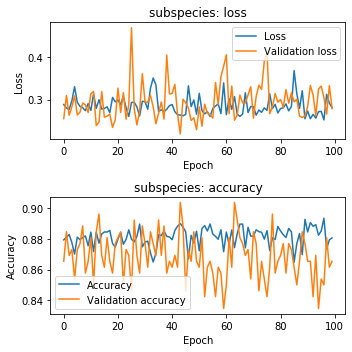

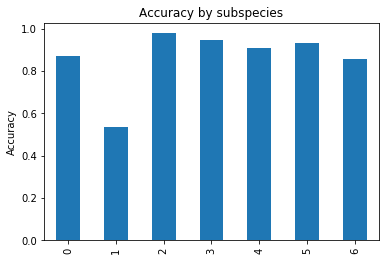

Classification report
                       precision    recall  f1-score   support

                   -1       0.98      0.87      0.92        70
1 Mixed local stock 2       0.59      0.54      0.56        69
  Carniolan honey bee       0.98      0.98      0.98        92
    Italian honey bee       0.91      0.94      0.93       490
    Russian honey bee       0.99      0.91      0.95       110
VSH Italian honey bee       0.87      0.93      0.90        29
    Western honey bee       0.86      0.86      0.86         7

             accuracy                           0.90       867
            macro avg       0.88      0.86      0.87       867
         weighted avg       0.90      0.90      0.90       867

Loss function: 0.27971211115268485, accuracy: 0.9042675893886967
StartTime:  20191115-145516  lr: 0.01  batch: 60 epochs:  100  Fin iteracion:  5
-------------------------------FIN-----------------------------------------


--------------------------------Inicio--------------------

405/405 [==============================] - 97s 240ms/step - loss: 0.2725 - acc: 0.8848 - val_loss: 0.2492 - val_acc: 0.8923
Epoch 54/80
405/405 [==============================] - 97s 240ms/step - loss: 0.2425 - acc: 0.8967 - val_loss: 0.2046 - val_acc: 0.8923
Epoch 55/80
405/405 [==============================] - 97s 240ms/step - loss: 0.2721 - acc: 0.8883 - val_loss: 0.2533 - val_acc: 0.8692
Epoch 56/80
405/405 [==============================] - 97s 239ms/step - loss: 0.2699 - acc: 0.8868 - val_loss: 0.2279 - val_acc: 0.8615
Epoch 57/80
405/405 [==============================] - 97s 239ms/step - loss: 0.2539 - acc: 0.8952 - val_loss: 0.2838 - val_acc: 0.8731
Epoch 58/80
405/405 [==============================] - 96s 238ms/step - loss: 0.2563 - acc: 0.8927 - val_loss: 0.2709 - val_acc: 0.8962
Epoch 59/80
405/405 [==============================] - 98s 242ms/step - loss: 0.2540 - acc: 0.8925 - val_loss: 0.2757 - val_acc: 0.8654
Epoch 60/80
405/405 [==============================] - 97s 2

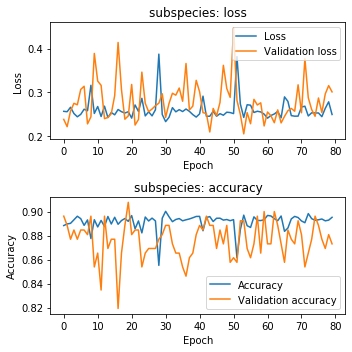

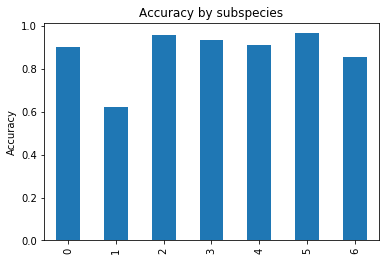

Classification report
                       precision    recall  f1-score   support

                   -1       0.98      0.90      0.94        70
1 Mixed local stock 2       0.57      0.62      0.60        69
  Carniolan honey bee       0.99      0.96      0.97        92
    Italian honey bee       0.91      0.93      0.92       490
    Russian honey bee       0.99      0.91      0.95       110
VSH Italian honey bee       0.97      0.97      0.97        29
    Western honey bee       1.00      0.86      0.92         7

             accuracy                           0.91       867
            macro avg       0.92      0.88      0.90       867
         weighted avg       0.91      0.91      0.91       867

Loss function: 0.26679213447286826, accuracy: 0.9054209919261822
StartTime:  20191115-160258  lr: 0.01  batch: 100 epochs:  80  Fin iteracion:  6
-------------------------------FIN-----------------------------------------


--------------------------------Inicio--------------------

405/405 [==============================] - 104s 258ms/step - loss: 0.2702 - acc: 0.8916 - val_loss: 0.2599 - val_acc: 0.8808
Epoch 53/100
405/405 [==============================] - 105s 258ms/step - loss: 0.2386 - acc: 0.9003 - val_loss: 0.3584 - val_acc: 0.8654
Epoch 54/100
405/405 [==============================] - 107s 264ms/step - loss: 0.2482 - acc: 0.8966 - val_loss: 0.3482 - val_acc: 0.8346
Epoch 55/100
405/405 [==============================] - 106s 261ms/step - loss: 0.2499 - acc: 0.8982 - val_loss: 0.3099 - val_acc: 0.8615
Epoch 56/100
405/405 [==============================] - 106s 262ms/step - loss: 0.2396 - acc: 0.9001 - val_loss: 0.3153 - val_acc: 0.8538
Epoch 57/100
405/405 [==============================] - 100s 248ms/step - loss: 0.2345 - acc: 0.8999 - val_loss: 0.2807 - val_acc: 0.8923
Epoch 58/100
405/405 [==============================] - 103s 254ms/step - loss: 0.2626 - acc: 0.8929 - val_loss: 0.2733 - val_acc: 0.9000
Epoch 59/100
405/405 [=========================

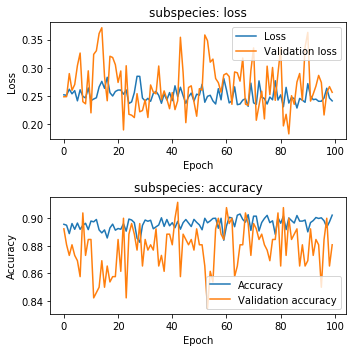

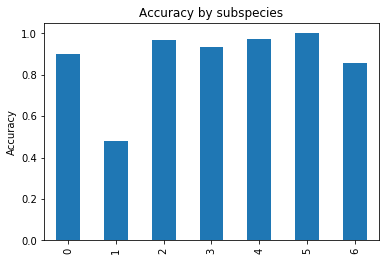

Classification report
                       precision    recall  f1-score   support

                   -1       0.93      0.91      0.92        70
1 Mixed local stock 2       0.56      0.48      0.52        69
  Carniolan honey bee       1.00      0.97      0.98        92
    Italian honey bee       0.91      0.94      0.92       490
    Russian honey bee       0.99      0.99      0.99       110
VSH Italian honey bee       0.97      1.00      0.98        29
    Western honey bee       1.00      0.86      0.92         7

             accuracy                           0.91       867
            macro avg       0.91      0.88      0.89       867
         weighted avg       0.91      0.91      0.91       867

Loss function: 0.26710971186180293, accuracy: 0.9100346020761245
StartTime:  20191115-181231  lr: 0.01  batch: 100 epochs:  100  Fin iteracion:  7
-------------------------------FIN-----------------------------------------


--------------------------------Inicio-------------------

KeyboardInterrupt: 

In [20]:
Iteration = 1

for lr in [0.01,0.001]:
    for batch_size in [150, 60, 100]:
        steps_per_epoch = steps_per_epoch * 1.5
        for  epochs in [ 80, 100]:
            StartTime = datetime.datetime.now()
            print("")
            print("--------------------------------Inicio----------------------------------------")
            print("StartTime: ", StartTime.strftime("%Y%m%d-%H%M%S") , ' lr:', lr,' batch:', batch_size, "epochs: ", epochs , " inicio iteracion: ", Iteration )
            print("")

            training1, model1 = Utils.train(Num_Architecture,Iteration ,
                                            model1,
                                            train_X,
                                            train_y, 
                                            batch_size = batch_size,
                                            epochs = epochs,
                                            validation_data_X = val_X, 
                                            validation_data_y = val_y,
                                            steps_per_epoch = steps_per_epoch,
                                            rotation_range = rotation_range,
                                            zoom_range = zoom_range, 
                                            width_shift_range = width_shift_range,
                                            height_shift_range = height_shift_range,
                                            horizontal_flip = horizontal_flip,  
                                            vertical_flip = vertical_flip,
                                            patience = patience,
                                            class_weights = class_weights,
                                            learn_rate = lr,
                                            StartTime = StartTime)

            print("")
            Utils.eval_model(training1, model1, test_X, test_y, 'subspecies')
            print("StartTime: ", StartTime.strftime("%Y%m%d-%H%M%S") , ' lr:', lr,' batch:', batch_size, "epochs: ", epochs , " Fin iteracion: ", Iteration )
            print("-------------------------------FIN-----------------------------------------")
            print("")
            Iteration = Iteration + 1
            patience = patience * 1.5
    steps_per_epoch = 40
    patience = 35


## 4.3 Evaluación del modelo

In [ ]:
Utils.eval_model(training1, model1, test_X, test_y, 'subspecies')